<a href="https://colab.research.google.com/github/DeepaliJosh/Car-Sales-Prediction-Utilizing-Multiple-Regression-Models/blob/main/Predicting_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car=pd.read_csv("/content/Car_sales.csv")

In [ ]:
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [ ]:
car.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

In [ ]:
car.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


From this we can inrefer that all our columns are in object type so now we convert them into int or the required type


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [ ]:
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


Here you can observe that there are no NaN (misssing values) but instead of that when you print the head you can also find that you have "." in your dataset.

In [ ]:
(car==".").sum()

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

Now, we can observe that there are

> 36 "." in 4- year resale value

> 3 "." in Fuel efficiency


You can drop the rows that contain 1 or 2 "."


Now we have to replace the above missing values. For that 1st we have to convert the "." into an int 0.







In [ ]:
car=car.replace('.',0);
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,0,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [ ]:
carp = car.astype({'4-year resale value':'float64','Price in thousands':'float64','Engine size':'float64','Horsepower':'int64','Wheelbase':'float64','Fuel capacity':'float64','Fuel efficiency':'int64','Length':'float64','Width':'float64','Curb weight':'float64'})

In [ ]:
carp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    float64
 6   Engine size          157 non-null    float64
 7   Horsepower           157 non-null    int64  
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb weight          157 non-null    float64
 12  Fuel capacity        157 non-null    float64
 13  Fuel efficiency      157 non-null    int64  
 14  Latest Launch        157 non-null    object 
dtypes: float64(9), int64(2), object(4)
memor

In [ ]:
carp.Model.value_counts().count()
#I just checked if there are any common car models

156

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,0.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15


In [ ]:
(carp==0).sum()

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

<ipython-input-16-3ee8646cfce5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carp['4-year resale value'])


<Axes: xlabel='4-year resale value', ylabel='Density'>

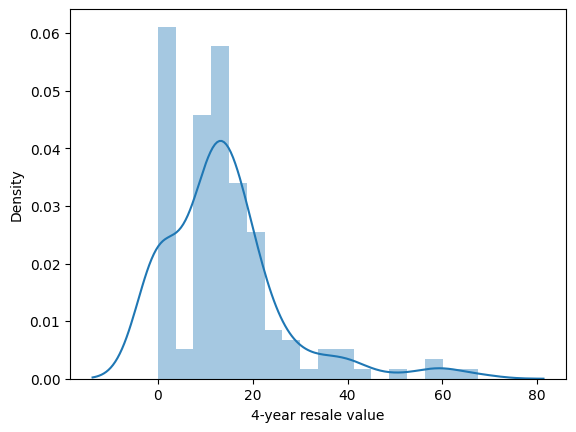

In [ ]:
sns.distplot(carp['4-year resale value'])
# sns.distplot(carp['4-year resale value'], kde = False, color ='red', bins = 30)

<ipython-input-17-7f02b72e63f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carp['Fuel efficiency'])


<Axes: xlabel='Fuel efficiency', ylabel='Density'>

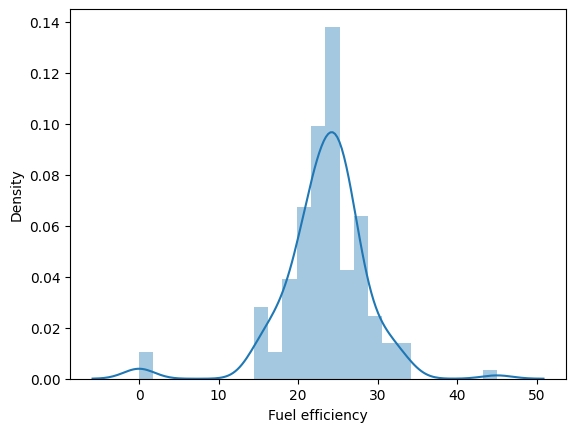

In [ ]:
sns.distplot(carp['Fuel efficiency'])

In [ ]:
carp['4-year resale value'].unique()

array([16.36 , 19.875, 18.225, 29.725, 22.255, 23.555, 39.   ,  0.   ,
       28.675, 36.125, 12.475, 13.74 , 20.19 , 13.36 , 22.525, 27.1  ,
       25.725,  9.25 , 11.225, 10.31 , 11.525, 13.025, 36.225,  9.125,
        5.16 , 12.36 , 14.18 , 13.725, 12.64 , 17.325, 19.54 ,  7.75 ,
       12.545, 10.185, 12.275, 58.47 , 15.06 , 15.51 , 13.425, 11.26 ,
       12.025,  7.425, 12.76 ,  8.835, 10.055, 14.21 , 16.64 , 13.175,
       23.575,  7.85 , 15.075,  9.85 , 13.21 , 17.71 , 17.525, 19.49 ,
        5.86 ,  7.825,  8.91 , 19.69 , 13.475, 13.775, 18.81 , 26.975,
       32.075, 40.375, 20.525, 21.725,  8.325, 10.395, 10.595, 16.575,
       20.94 , 19.125, 13.88 ,  8.8  , 13.89 , 11.03 , 14.875, 20.43 ,
       14.795, 26.05 , 41.45 , 50.375, 58.6  ,  8.45 , 11.295, 15.125,
       15.38 , 17.81 , 11.24 , 19.89 , 19.925, 15.24 ,  9.8  , 13.79 ,
       10.29 , 17.805, 14.01 , 13.225, 41.25 , 60.625, 67.55 ,  9.2  ,
       10.59 , 10.79 , 10.025, 13.245, 18.14 , 15.445,  9.575, 13.325,
      

In [ ]:
carp['Fuel efficiency'].unique()
#Discrete Data (It is always Preferable to replace the values through mode)

array([28, 25, 26, 22, 27, 21, 24, 23, 15, 33, 45,  0, 29, 16, 17, 19, 30,
       18, 32, 31, 20])

In [ ]:
def impute_nan(carp,variable,aggregate):
    carp[variable+"_imputed"]=carp[variable].replace(0,aggregate)

In [ ]:
mode_fe=carp['Fuel efficiency'].mode()
mode_fe[0]

25

In [ ]:
mode_fe=carp['Fuel efficiency'].mode()
median_rv=carp['4-year resale value'].median()

impute_nan(carp,'Fuel efficiency',mode_fe[0])
impute_nan(carp,'4-year resale value',median_rv)

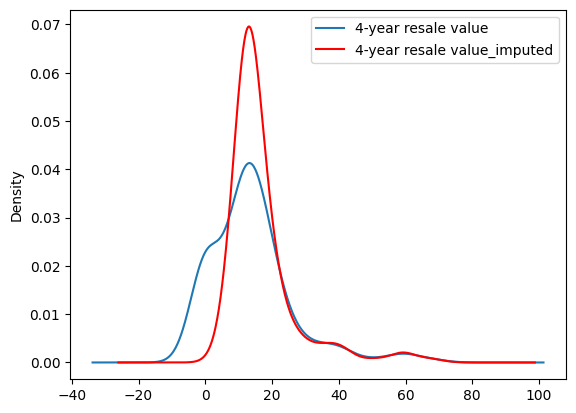

In [ ]:
fig, ax = plt.subplots()
carp['4-year resale value'].plot(kind='kde', ax=ax)
carp['4-year resale value_imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(carp['4-year resale value'].std())
print(carp['4-year resale value_imputed'].std())

12.609543227567295
10.268387553233959


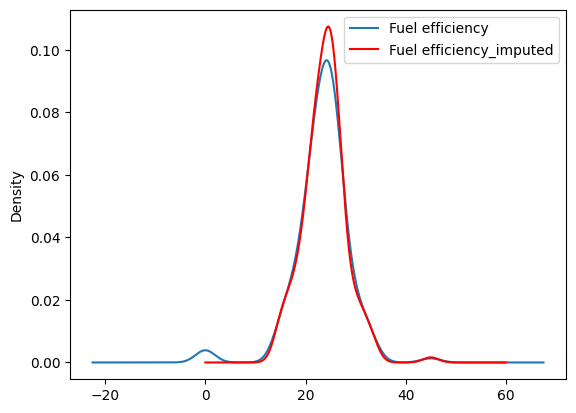

In [ ]:
fig, ax = plt.subplots()
carp['Fuel efficiency'].plot(kind='kde', ax=ax)
carp['Fuel efficiency_imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(carp['Fuel efficiency'].std())
print(carp['Fuel efficiency_imputed'].std())

5.358493954041161
4.244295630912205


In [ ]:
# carpp = carp.drop((carp==0).any(axis=1), axis=0)
# # drop rows with any zero value in any column

carp.replace(0, pd.np.nan, inplace=True)

# drop rows containing NaN
carp.dropna(inplace=True)

<ipython-input-27-8db0fe76dd6d>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  carp.replace(0, pd.np.nan, inplace=True)


In [ ]:
(carp==0).sum()

Manufacturer                   0
Model                          0
Sales in thousands             0
4-year resale value            0
Vehicle type                   0
Price in thousands             0
Engine size                    0
Horsepower                     0
Wheelbase                      0
Width                          0
Length                         0
Curb weight                    0
Fuel capacity                  0
Fuel efficiency                0
Latest Launch                  0
Fuel efficiency_imputed        0
4-year resale value_imputed    0
dtype: int64

In [ ]:
carp[['Day','Month','Year']]=carp['Latest Launch'].str.split('-',expand=True)

carp['Year']='20'+carp['Year'].astype(str)
carp
# spliting the latest launch (Date columns)

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-Feb-14,28,16.360,02,Feb,2014
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-Mar-15,25,19.875,06,Mar,2015
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-Oct-15,22,29.725,03,Oct,2015
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15,27,22.255,10,Aug,2015
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,08-Sep-15,22,23.555,08,Sep,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,24-Jan-15,26,11.425,24,Jan,2015
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,27-Aug-15,26,13.240,27,Aug,2015
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,30-Oct-14,27,16.725,30,Oct,2014
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,31-May-15,26,16.575,31,May,2015


In [ ]:
# carp.drop(columns='Latest Launch',inplace=True)
carp.drop(columns=['Fuel efficiency','4-year resale value','Latest Launch'],inplace=True)

In [ ]:
carp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 117 non-null    object 
 1   Model                        117 non-null    object 
 2   Sales in thousands           117 non-null    float64
 3   Vehicle type                 117 non-null    object 
 4   Price in thousands           117 non-null    float64
 5   Engine size                  117 non-null    float64
 6   Horsepower                   117 non-null    float64
 7   Wheelbase                    117 non-null    float64
 8   Width                        117 non-null    float64
 9   Length                       117 non-null    float64
 10  Curb weight                  117 non-null    float64
 11  Fuel capacity                117 non-null    float64
 12  Fuel efficiency_imputed      117 non-null    int64  
 13  4-year resale value_

<ipython-input-32-636dbadad689>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year',y = 'Price in thousands',data = carp,ci=None)


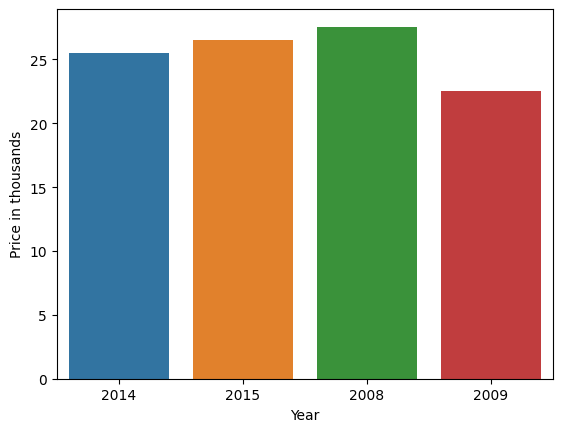

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Year',y = 'Price in thousands',data = carp,ci=None)
plt.show()

2008 has the highest price in thousands and 2009 has the lowest price in thousands.

<ipython-input-33-b91850033b2f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year',y = 'Sales in thousands',data = carp,ci=None)


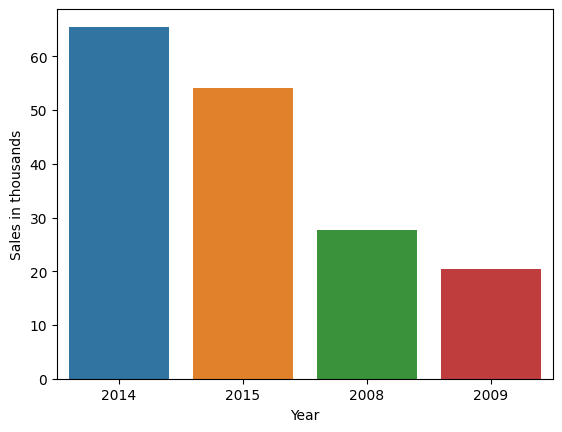

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Year',y = 'Sales in thousands',data = carp,ci=None)
plt.show()

2014 has the highest sales in thousands and 2009 has the lowest sales in thousands.

<ipython-input-34-062666ff9b9c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month',y = 'Price in thousands',data = carp,ci=None)


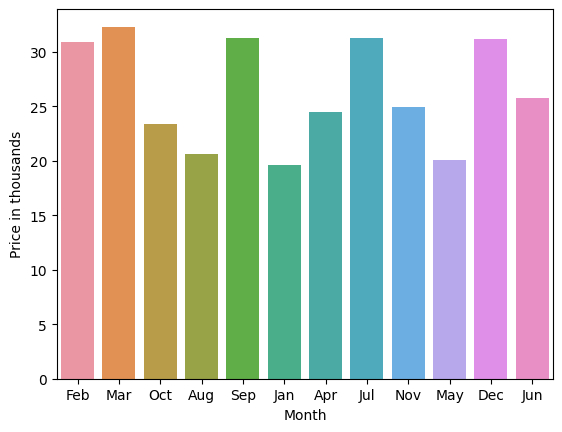

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Month',y = 'Price in thousands',data = carp,ci=None)
plt.show()

March has the highest price in thousands and January has the lowest price in thousands.

<ipython-input-35-d32f51c7f19e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month',y = 'Sales in thousands',data = carp,ci=None)


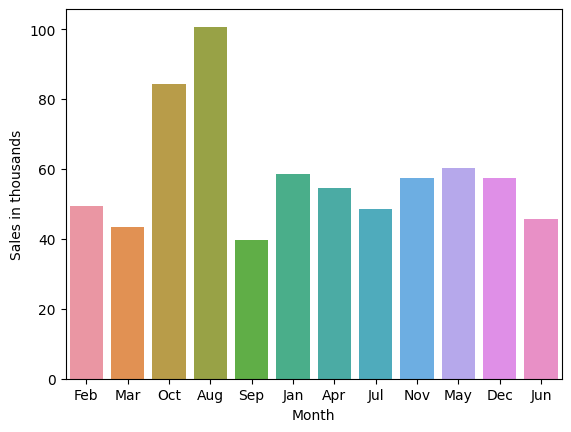

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Month',y = 'Sales in thousands',data = carp,ci=None)
plt.show()

Aug has the highest sales in thousands and Sep has the lowest sales in thousands

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,16.360,02,Feb,2014
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,19.875,06,Mar,2015
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,29.725,03,Oct,2015
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,22.255,10,Aug,2015
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,23.555,08,Sep,2015


In [ ]:
carp.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency_imputed',
       '4-year resale value_imputed', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
carp['Vehicle type'].unique()
#  Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.

array(['Passenger', 'Car'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

carp['Vehicle type']= label_encoder.fit_transform(carp['Vehicle type'])

In [ ]:
carp['Vehicle type'].unique()

array([1, 0])

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,16.360,02,Feb,2014
1,Acura,TL,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,19.875,06,Mar,2015
3,Acura,RL,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,29.725,03,Oct,2015
4,Audi,A4,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,22.255,10,Aug,2015
5,Audi,A6,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,23.555,08,Sep,2015


<ipython-input-42-56c9ef96ba3d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x="Vehicle type",hue="Vehicle type",y="Sales in thousands",data=carp,ci=0,dodge=False)


<Axes: xlabel='Vehicle type', ylabel='Sales in thousands'>

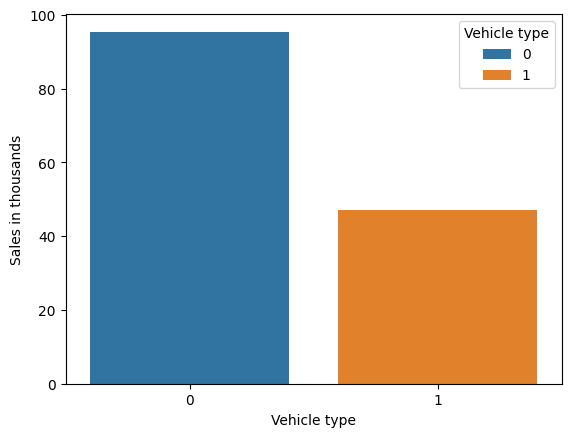

In [ ]:
sns.barplot(x="Vehicle type",hue="Vehicle type",y="Sales in thousands",data=carp,ci=0,dodge=False)

# Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.

**Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.**


Vehicle Type (Car) has the highest number of sales.


<ipython-input-43-63838a455af9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x="Vehicle type",hue="Vehicle type",y="Price in thousands",data=carp,ci=0,dodge=False)


<Axes: xlabel='Vehicle type', ylabel='Price in thousands'>

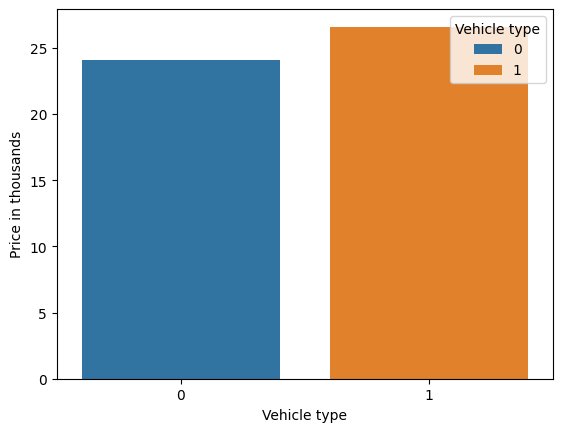

In [ ]:
sns.barplot(x="Vehicle type",hue="Vehicle type",y="Price in thousands",data=carp,ci=0,dodge=False)

**Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.**


Vehicle Type (Passenger) has the highest number of sales.

In [ ]:
manf=pd.DataFrame(carp['Manufacturer'].value_counts())
manf.head()

,Manufacturer
Ford,10
Dodge,9
Chevrolet,8
Toyota,8
Mitsubishi,7


<Axes: >

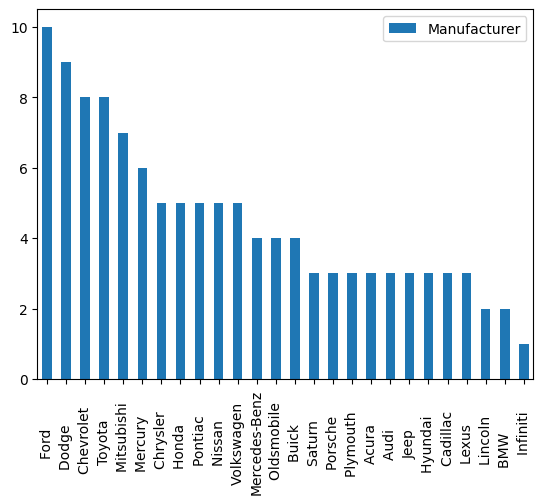

In [ ]:
manf.plot(kind="bar")

Ford is the highest Manufacturer among the other manufacturer.

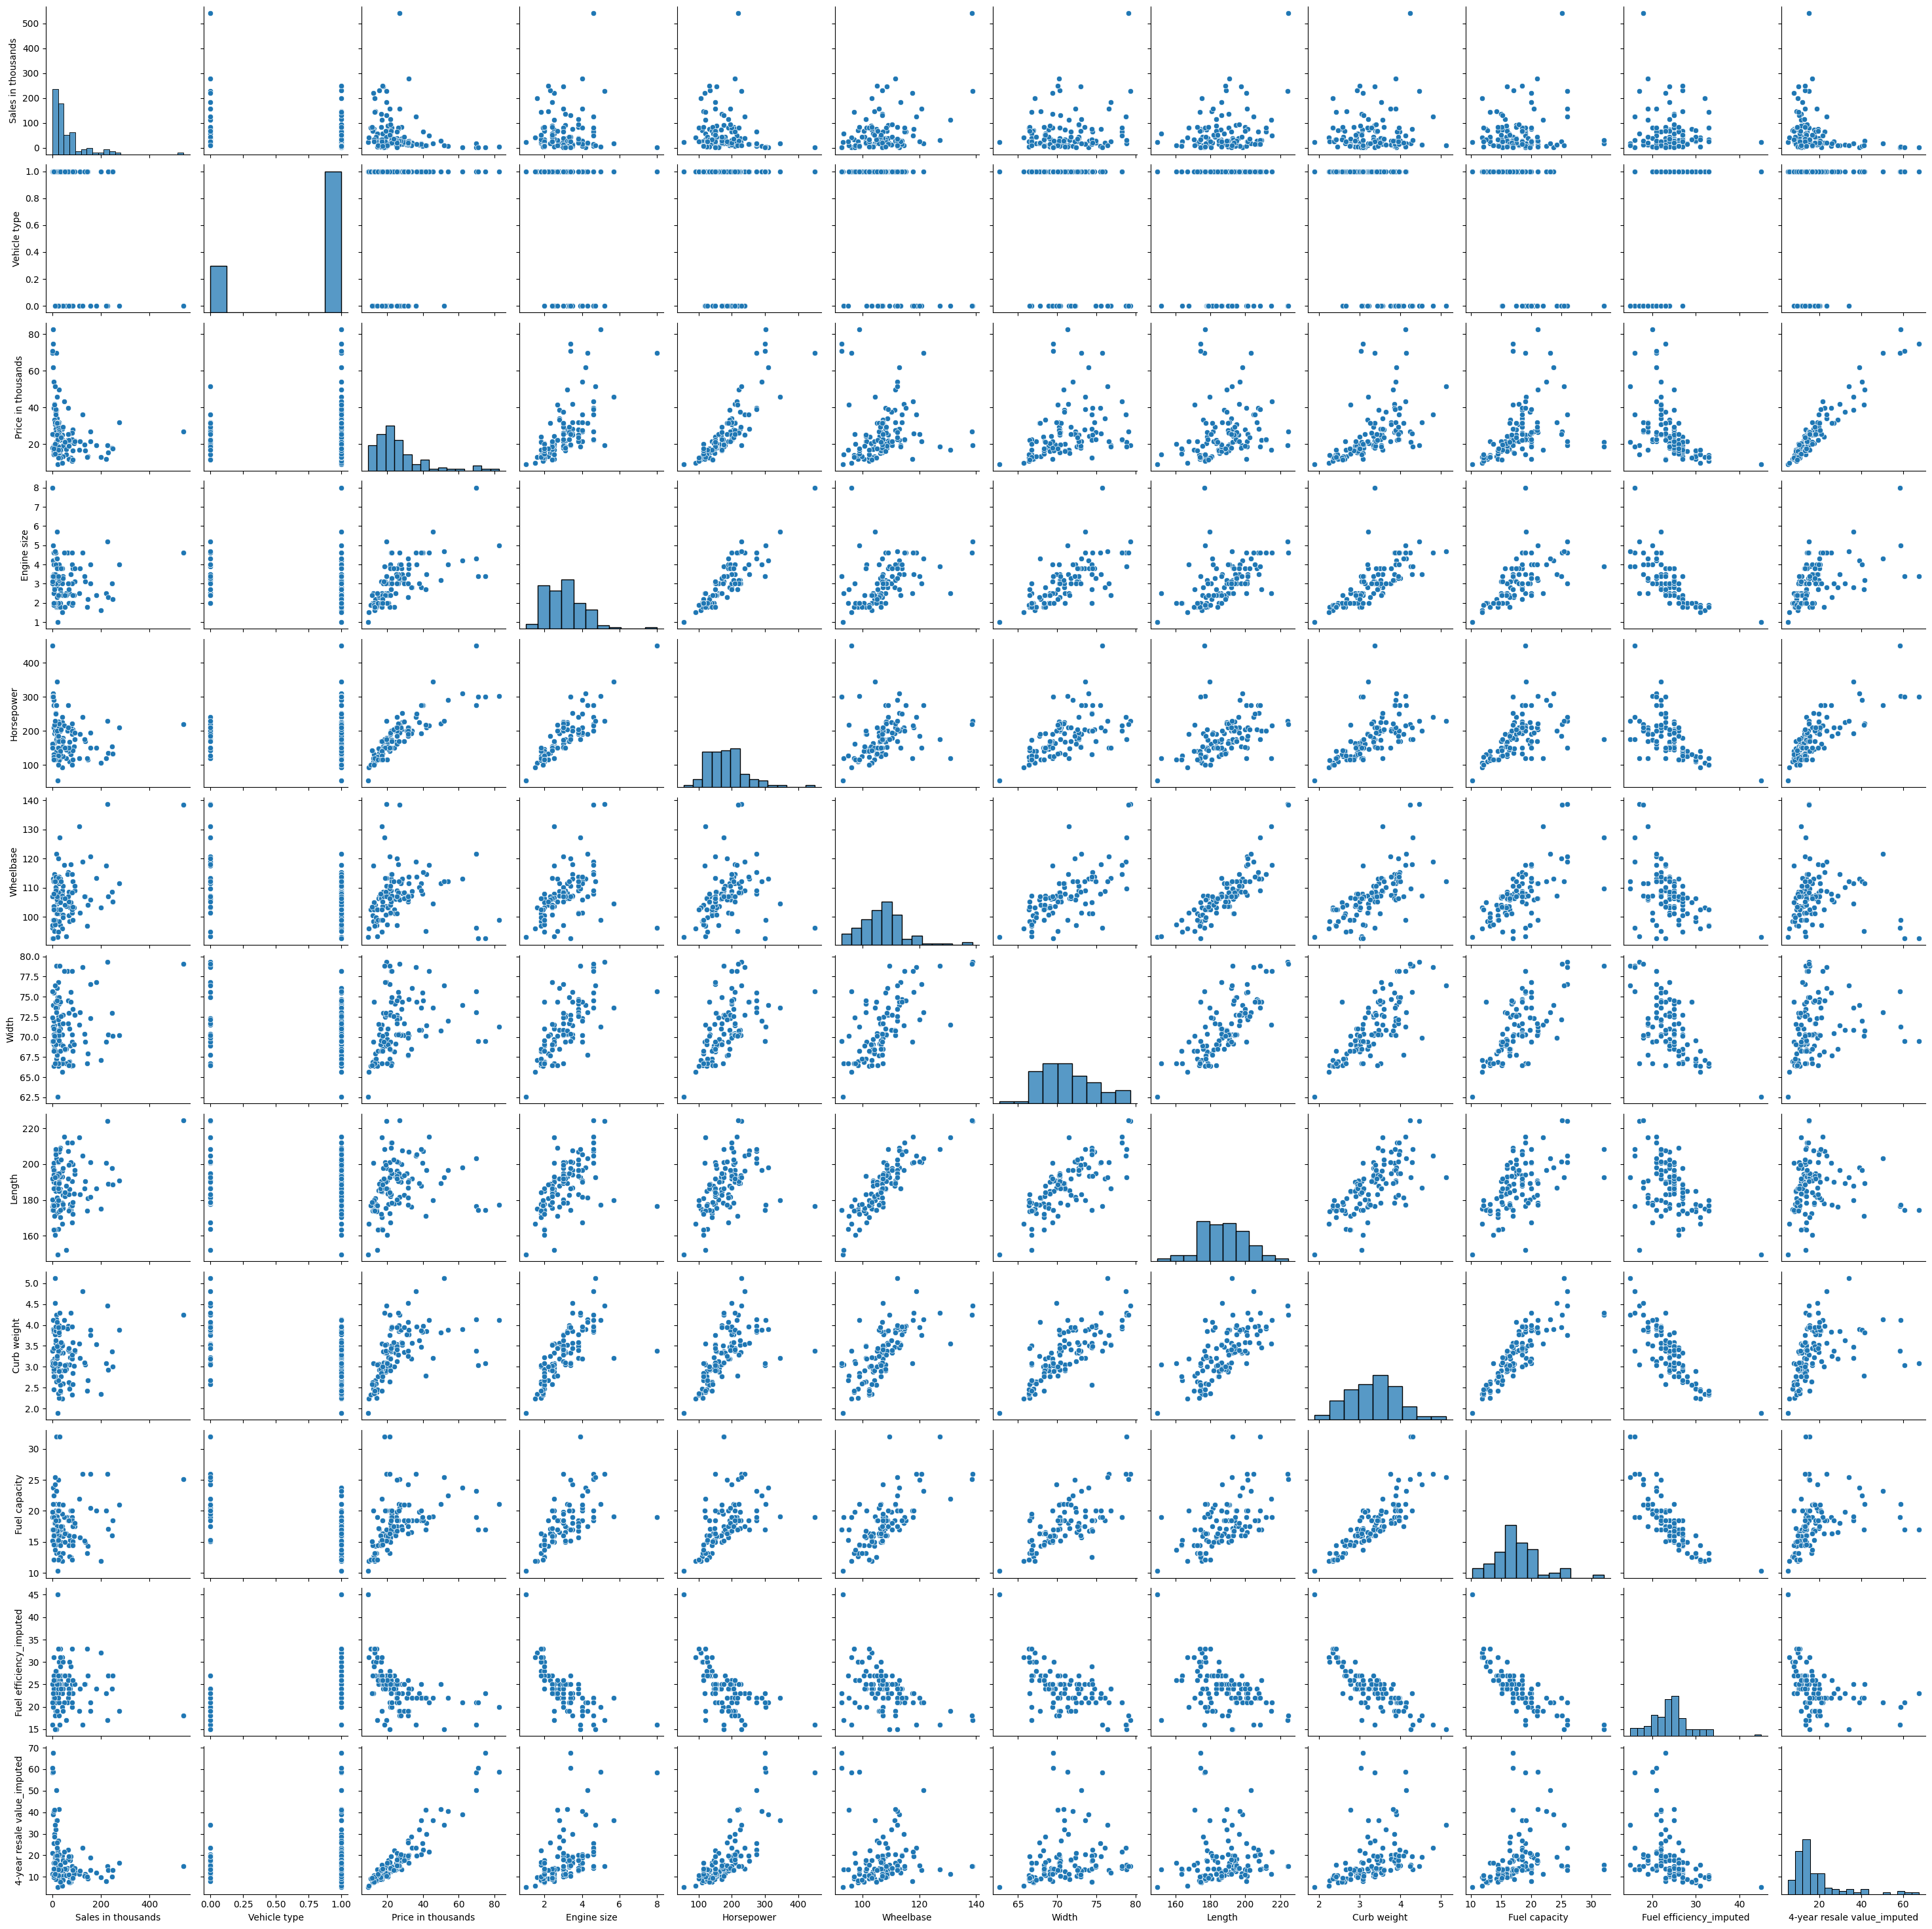

In [ ]:
sns.pairplot(carp)

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,16.360,02,Feb,2014
1,Acura,TL,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,19.875,06,Mar,2015
3,Acura,RL,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,29.725,03,Oct,2015
4,Audi,A4,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,22.255,10,Aug,2015
5,Audi,A6,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,23.555,08,Sep,2015


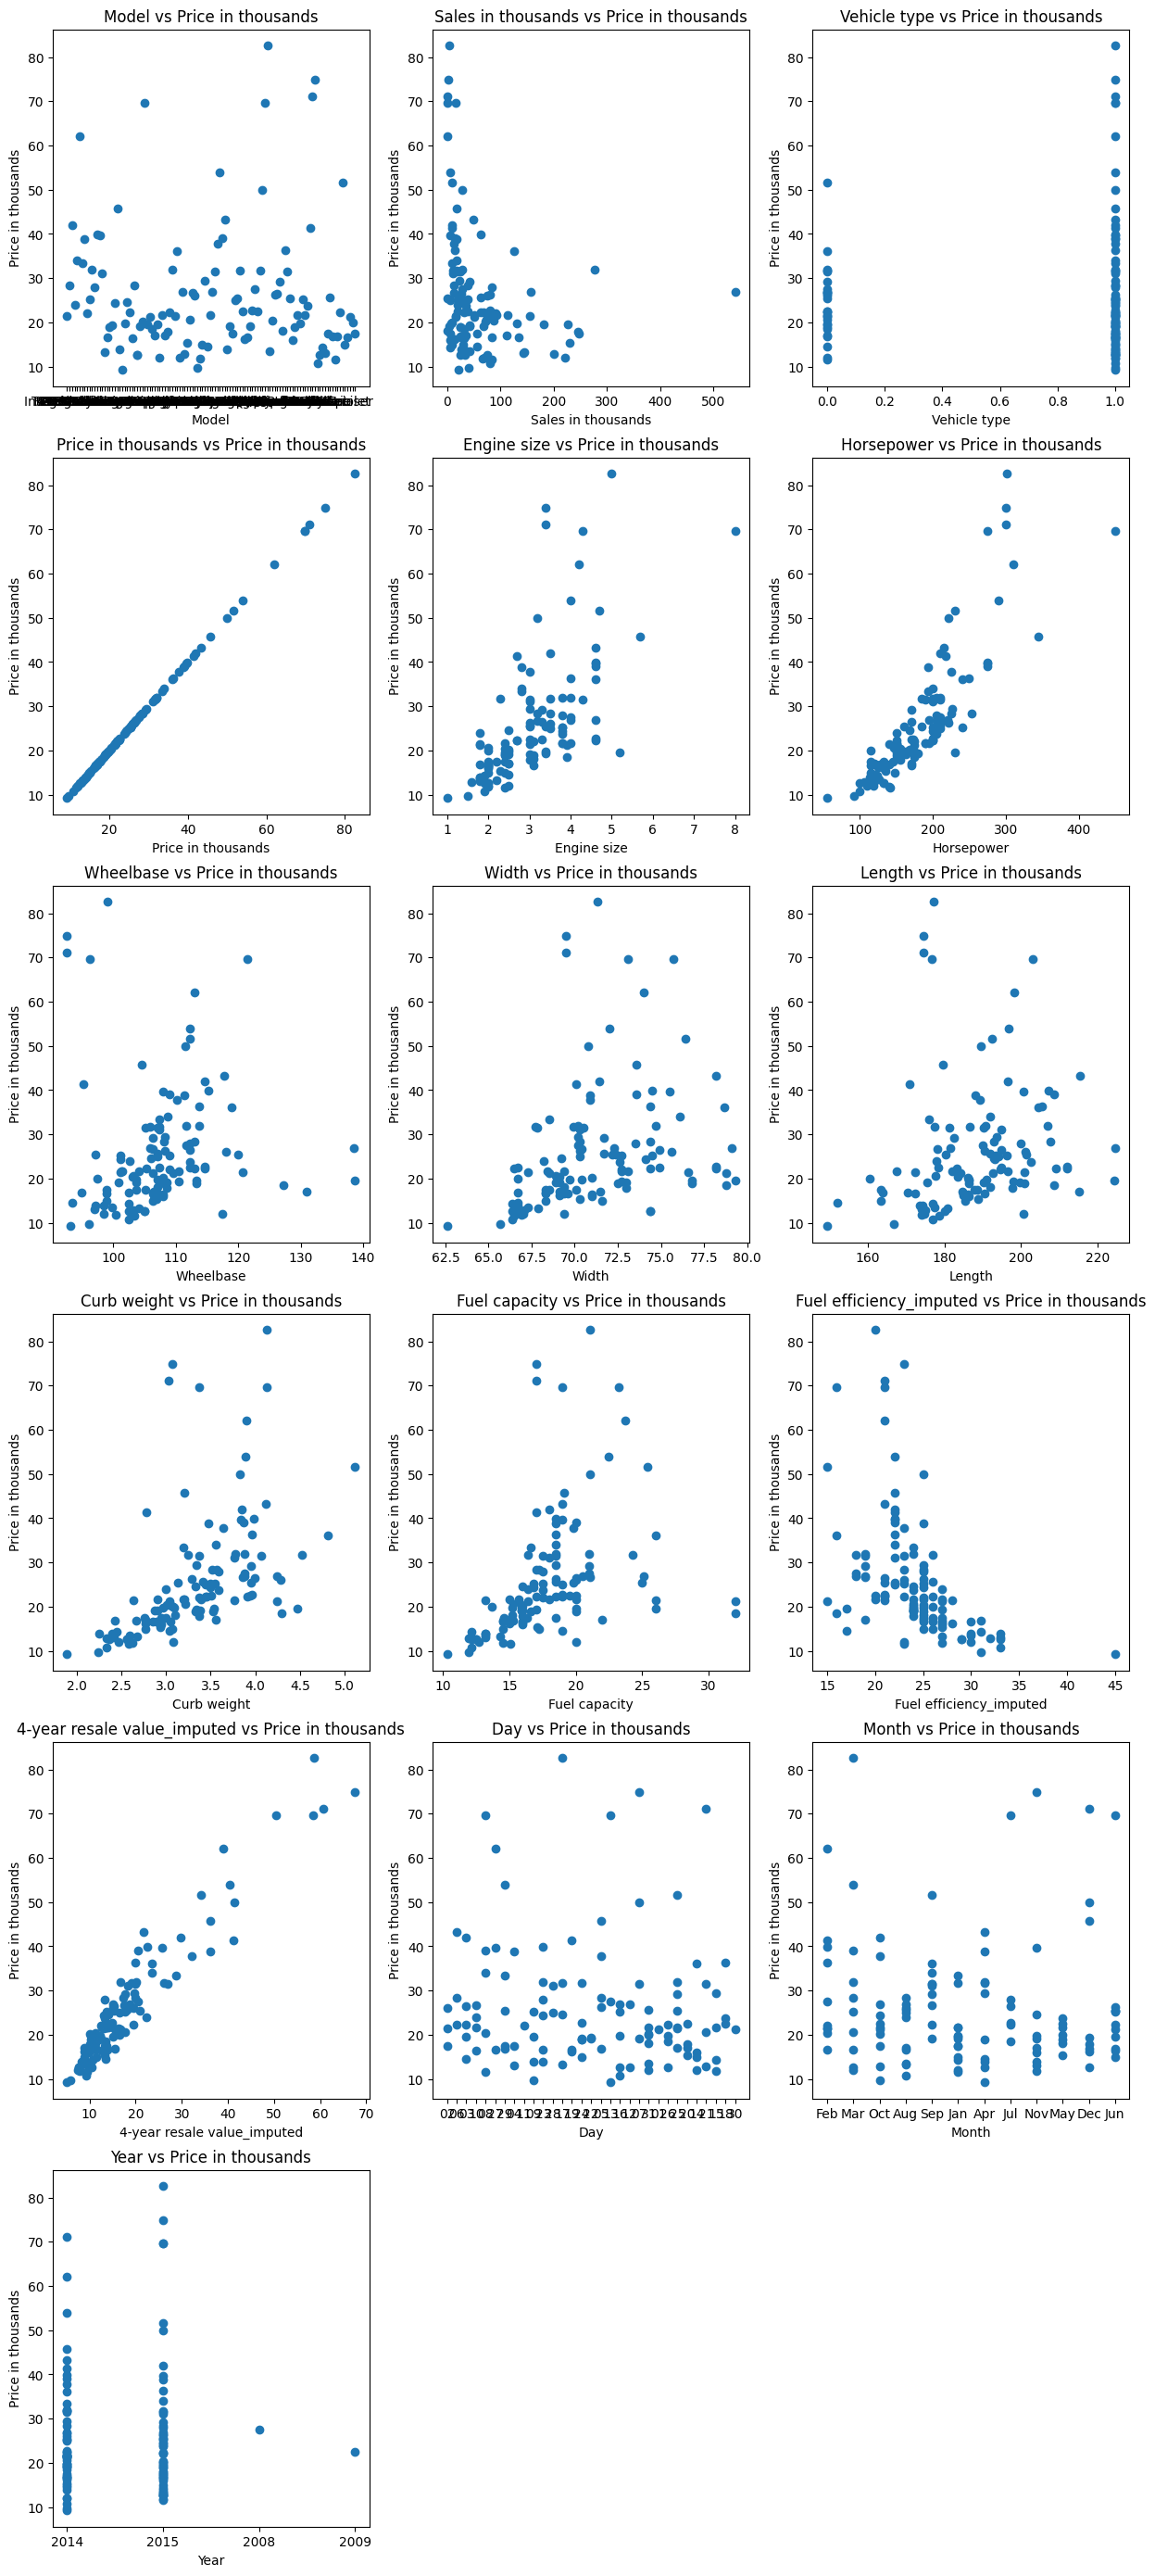

In [ ]:
# Defining a function to plot scatter plots for given column against Price
def scatter(col, fig):
    plt.subplot(6,3,fig)
    plt.scatter(carp[col],carp['Price in thousands'])
    plt.title(col + ' vs Price in thousands')
    plt.ylabel('Price in thousands')
    plt.xlabel(col)

plt.figure(figsize=(15, 35))

i = 1
for col in carp.columns[1:]:
    scatter(col, i)
    i += 1

plt.show()

1. We can see that there is no relatioship between the Latest Launch, Month, Day,Model with respect to price .
2. Sales in thousands,4-year resale value,Price in thousands,Engine size, Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity are positively correlated with price.
3. Fuel Efficiency is negatively correlated with price.


<ipython-input-49-ddc0a29d2b19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(carp.corr(), annot = True)


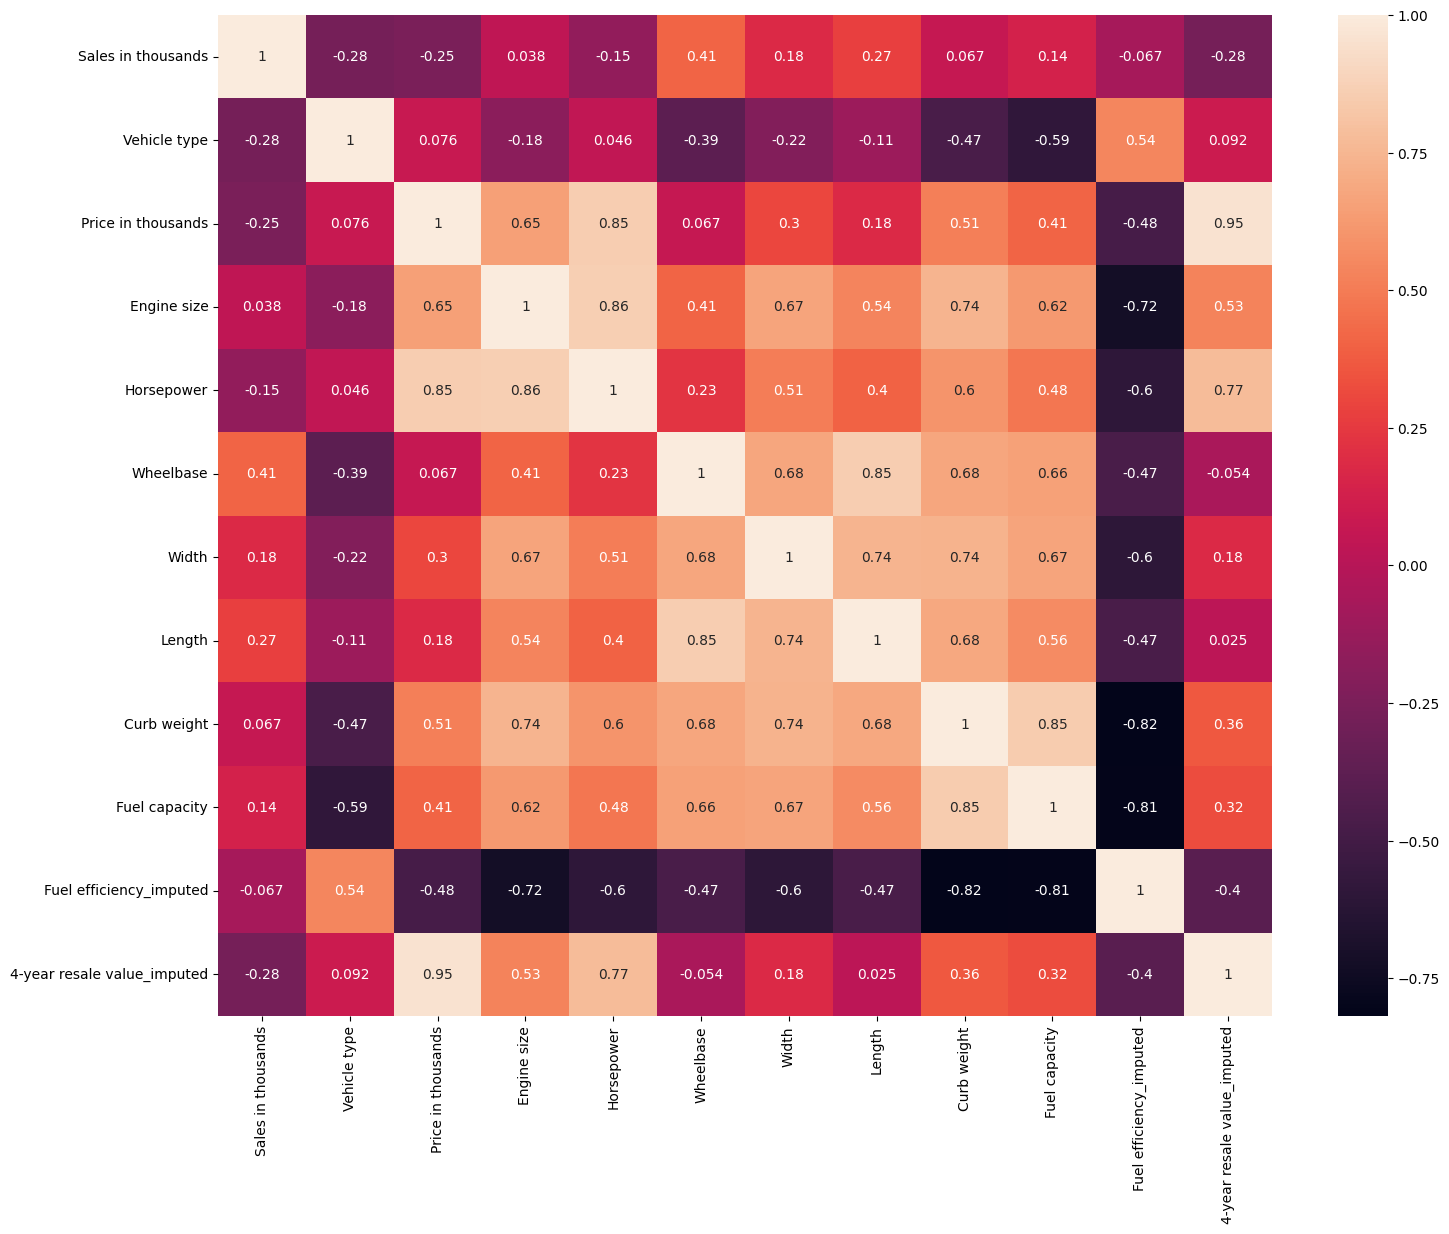

In [ ]:
plt.figure(figsize = (17, 13))

sns.heatmap(carp.corr(), annot = True)
plt.show()

In [ ]:
carp.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency_imputed',
       '4-year resale value_imputed', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
carp.dtypes

Manufacturer                    object
Model                           object
Sales in thousands             float64
Vehicle type                     int64
Price in thousands             float64
Engine size                    float64
Horsepower                     float64
Wheelbase                      float64
Width                          float64
Length                         float64
Curb weight                    float64
Fuel capacity                  float64
Fuel efficiency_imputed          int64
4-year resale value_imputed    float64
Day                             object
Month                           object
Year                            object
dtype: object

In [ ]:
carp['Day'].astype('int64')

0       2
1       6
3       3
4      10
5       8
       ..
145    24
146    27
147    30
148    31
149     4
Name: Day, Length: 117, dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

carp['Manufacturer']= label_encoder.fit_transform(carp['Manufacturer'])
carp['Model']= label_encoder.fit_transform(carp['Model'])
carp['Month']= label_encoder.fit_transform(carp['Month'])
carp['Year']= label_encoder.fit_transform(carp['Year'])

In [ ]:
carp_lr = carp[['Sales in thousands', 'Vehicle type',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Fuel capacity', 'Year', 'Fuel efficiency_imputed',
       'Curb weight', 'Price in thousands',
       '4-year resale value_imputed']].copy()
carp_lr.head()

,Sales in thousands,Vehicle type,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Year,Fuel efficiency_imputed,Curb weight,Price in thousands,4-year resale value_imputed
0,16.919,1,1.8,140.0,101.2,67.3,172.4,13.2,2,28,2.639,21.50,16.360
1,39.384,1,3.2,225.0,108.1,70.3,192.9,17.2,3,25,3.517,28.40,19.875
3,8.588,1,3.5,210.0,114.6,71.4,196.6,18.0,3,22,3.850,42.00,29.725
4,20.397,1,1.8,150.0,102.6,68.2,178.0,16.4,3,27,2.998,23.99,22.255
5,18.780,1,2.8,200.0,108.7,76.1,192.0,18.5,3,22,3.561,33.95,23.555


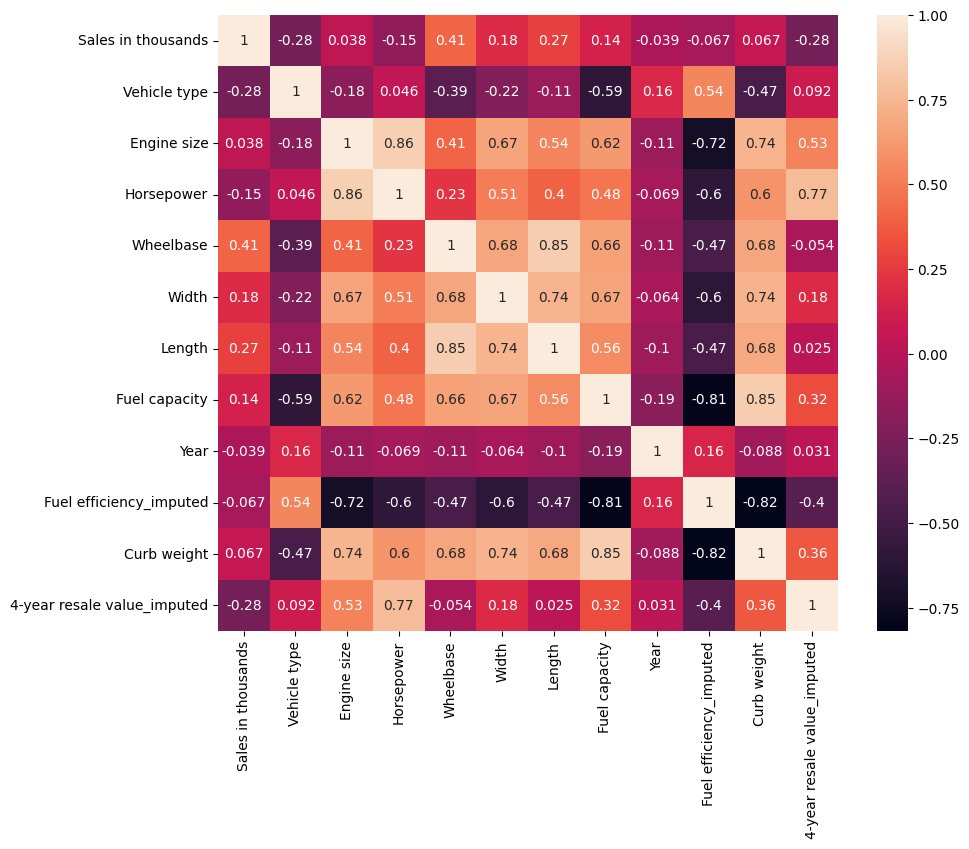

In [ ]:
plt.figure(figsize = (10,8))

sns.heatmap(carp_lr.drop(['Price in thousands'], axis=1).corr(), annot = True)
plt.show()

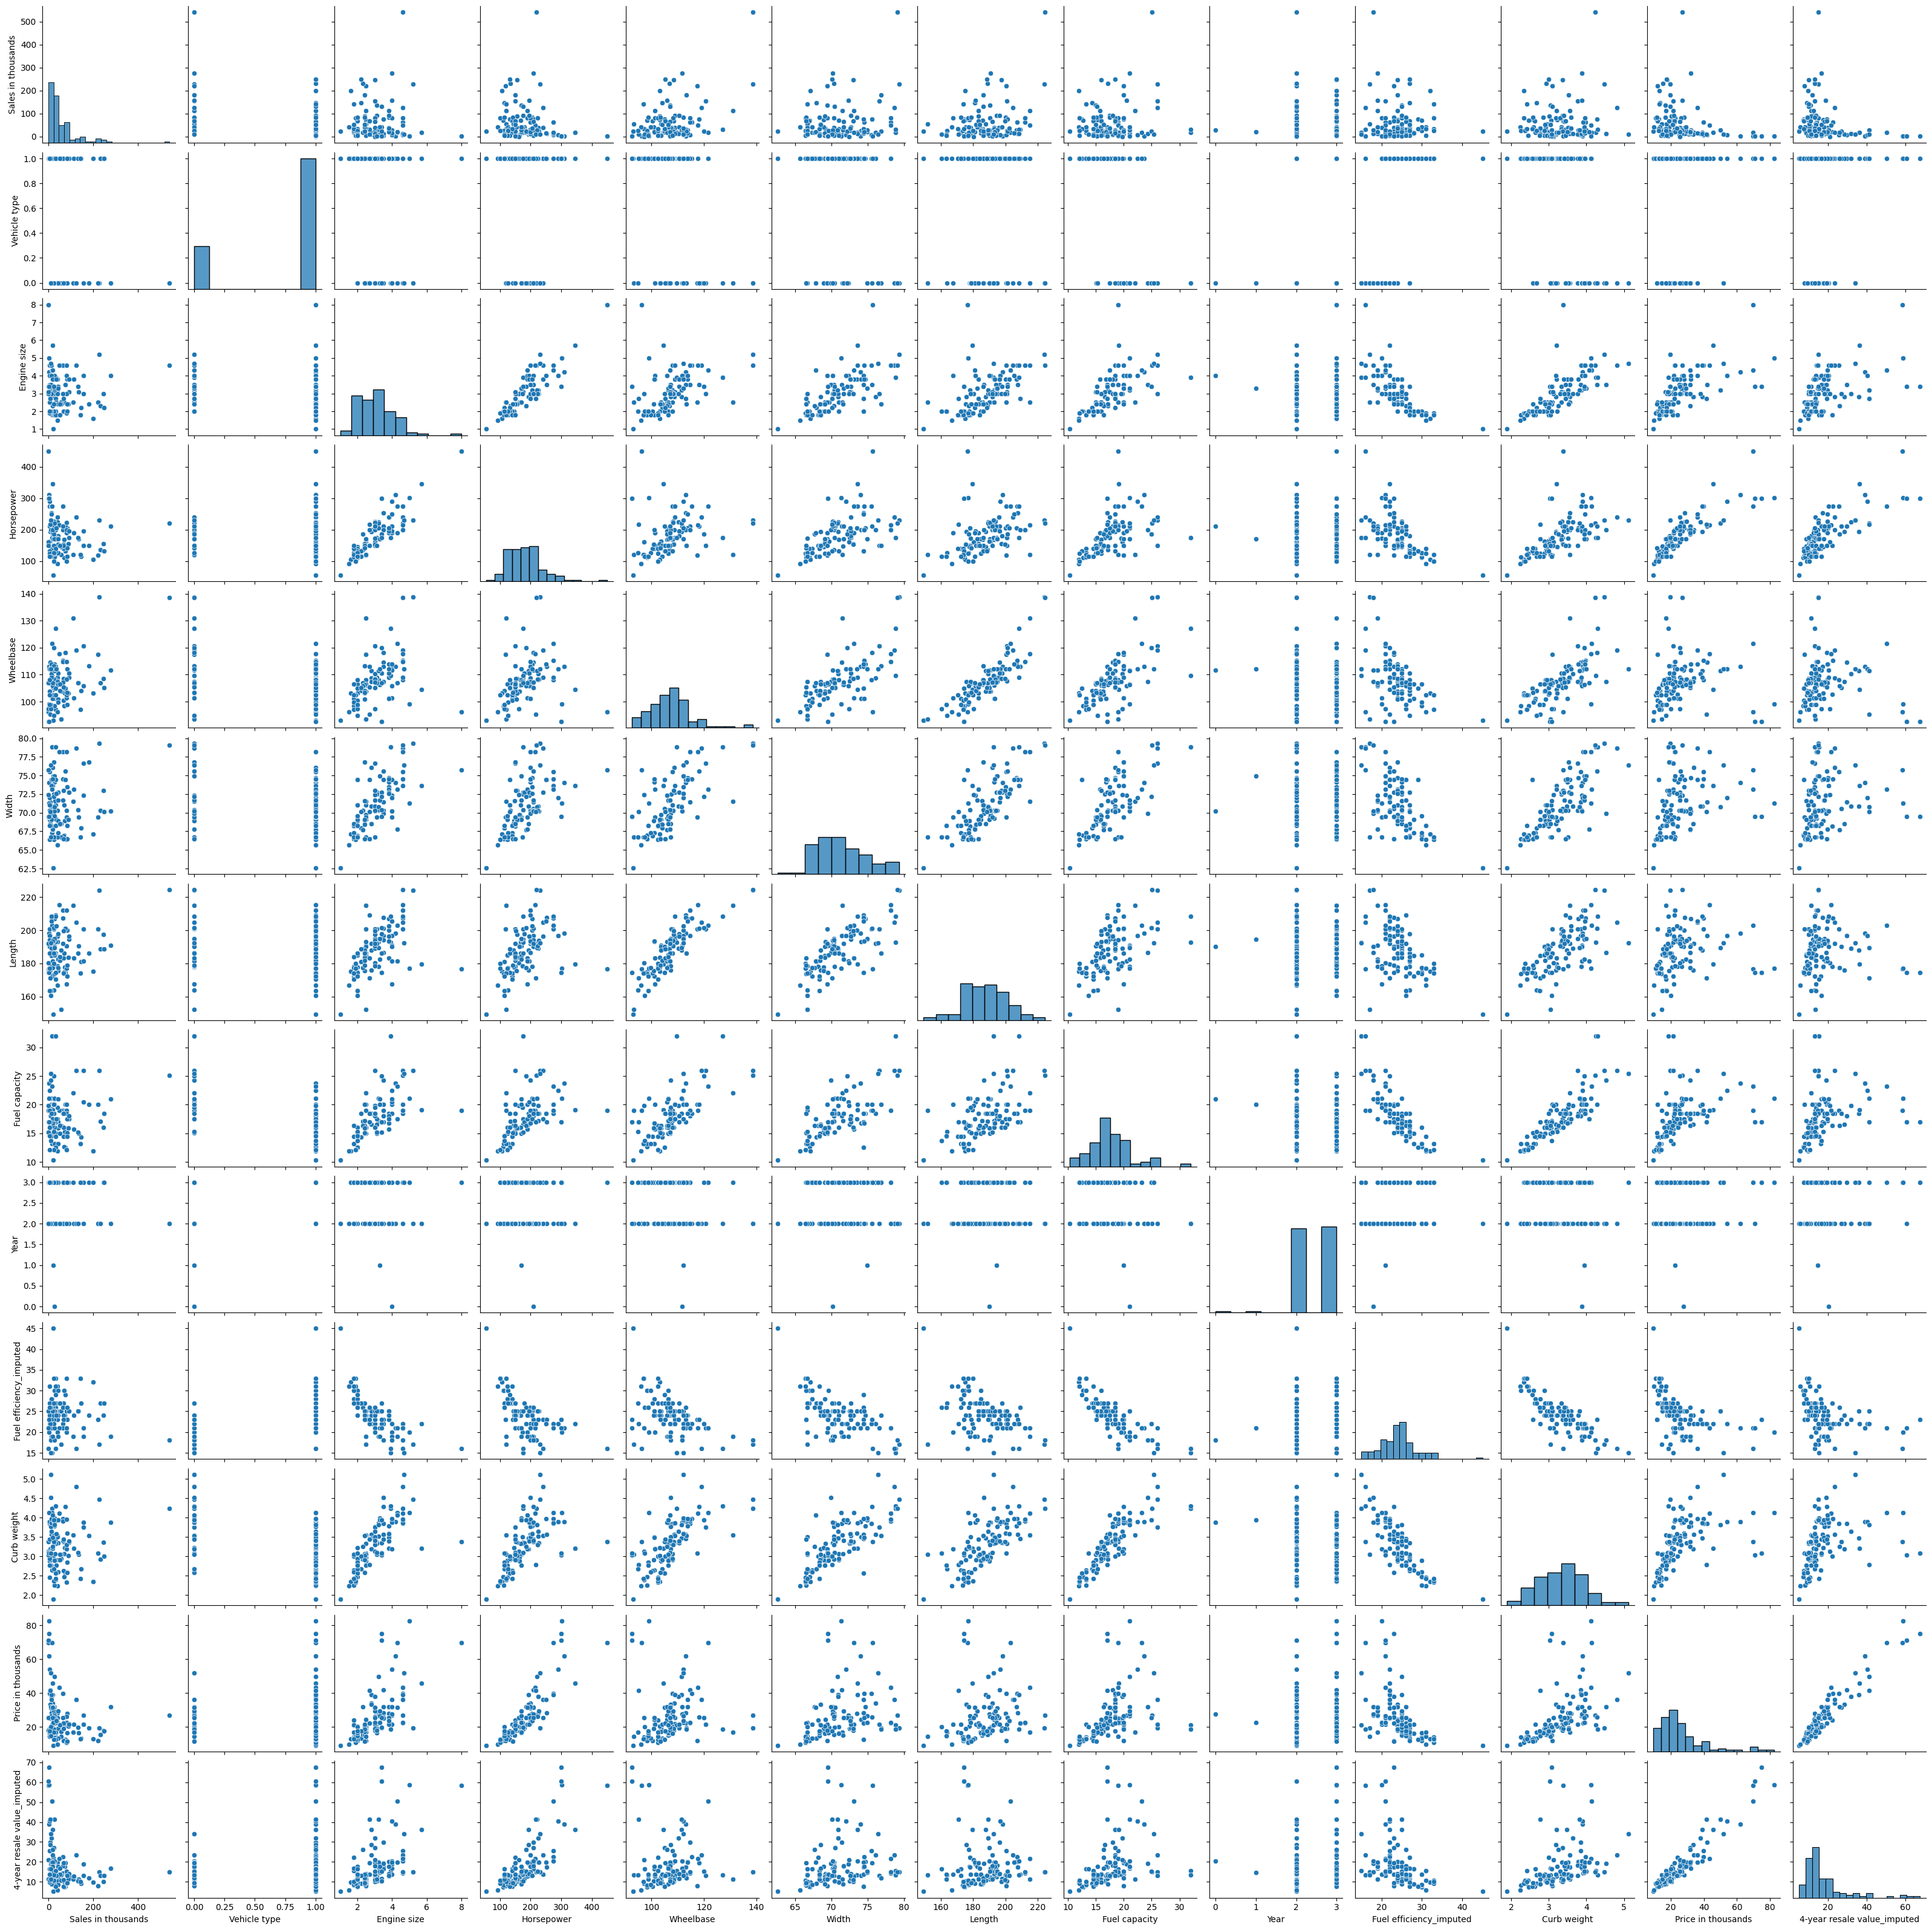

In [ ]:
sns.pairplot(carp_lr)
plt.show()

In [ ]:
carp_final=carp_lr.drop(['Vehicle type','Year','Fuel efficiency_imputed'], axis=1)
carp_final.head()


,Sales in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Curb weight,Price in thousands,4-year resale value_imputed
0,16.919,1.8,140.0,101.2,67.3,172.4,13.2,2.639,21.50,16.360
1,39.384,3.2,225.0,108.1,70.3,192.9,17.2,3.517,28.40,19.875
3,8.588,3.5,210.0,114.6,71.4,196.6,18.0,3.850,42.00,29.725
4,20.397,1.8,150.0,102.6,68.2,178.0,16.4,2.998,23.99,22.255
5,18.780,2.8,200.0,108.7,76.1,192.0,18.5,3.561,33.95,23.555


   """
    Split the data into train and test sets, fit  Regression models,
    and calculate various regression metrics.

    Parameters:
    - X: Features DataFrame (excluding the target variable)
    - y: Target variable Series
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Seed for random number generation (for reproducibility)

    Returns:
    - A DataFrame containing the following metrics:
      - Mean Absolute Error (MAE)
      - Mean Squared Error (MSE)
      - Root Mean Squared Error (RMSE)
      - R-Squared (R^2)
      - Adjusted R-Squared (Adjusted R^2)
    """

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt


def train_test_regression_metrics(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):

    # Calculate regression metrics for training set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    r_squared_train = r2_score(y_train, y_train_pred) * 100  # Convert to percentage

    # Calculate regression metrics for testing set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    r_squared_test = r2_score(y_test, y_test_pred) * 100  # Convert to percentage

    # Calculate Adjusted R-Squared for training set
    n_train = X_train.shape[0]  # Number of samples in the training set
    p_train = X_train.shape[1]  # Number of features in the training set
    adjusted_r_squared_train = (1 - (1 - r_squared_train / 100) * (n_train - 1) / (n_train - p_train - 1)) * 100  # Convert to percentage

    # Calculate Adjusted R-Squared for testing set
    n_test = X_test.shape[0]  # Number of samples in the testing set
    p_test = X_test.shape[1]  # Number of features in the testing set
    adjusted_r_squared_test = (1 - (1 - r_squared_test / 100) * (n_test - 1) / (n_test - p_test - 1)) * 100  # Convert to percentage

    # Create DataFrames to store the metrics
    train_metrics = pd.DataFrame({
        'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-Squared', 'Adjusted R-Squared'],
        'Training Data': [mae_train, mse_train, rmse_train, r_squared_train, adjusted_r_squared_train]
    })

    test_metrics = pd.DataFrame({
        'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-Squared', 'Adjusted R-Squared'],
        'Testing Data': [mae_test, mse_test, rmse_test, r_squared_test, adjusted_r_squared_test]
    })

    # Concatenate the two DataFrames horizontally
    metrics_df = pd.concat([train_metrics.set_index('Metric'), test_metrics.set_index('Metric')], axis=1).reset_index()

    return metrics_df


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Assuming you have loaded your dataset into 'carp_final' DataFrame as mentioned in your question.
X = carp_final.drop(['Price in thousands'], axis=1)
y = carp_final['Price in thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


# Call the function to get the regression metrics
metrics_df = train_test_regression_metrics(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

# Print the combined metrics DataFrame
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,2.194439,1.999609
1,Mean Squared Error,9.011348,7.117250
2,Root Mean Squared Error,3.001891,2.667817
3,R-Squared,95.851475,94.955726
4,Adjusted R-Squared,95.366582,92.685803


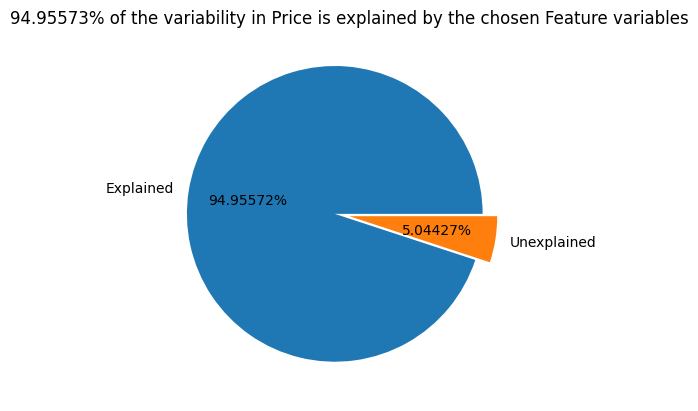

In [ ]:
# Plot the explained and unexplained variability separately
data = [metrics_df.loc[3, 'Testing Data'], 100 - metrics_df.loc[3, 'Testing Data']]
keys = ["Explained", "Unexplained"]
explode = [0.1, 0]

plt.title(f"{metrics_df.loc[3, 'Testing Data']:.5f}% of the variability in Price is explained by the chosen Feature variables")
plt.pie(data, labels=keys, explode=explode, autopct='%.5f%%')
plt.show()

In [ ]:
# Create a DataFrame for actual price, predicted price, and the difference
y_test_actual = y_test.reset_index(drop=True)
actual_vs_pred_df = pd.DataFrame({'Actual Price': y_test_actual, 'Predicted Price': y_test_pred, 'Difference': y_test_actual - y_test_pred})

# Print the DataFrame for actual price, predicted price, and the difference
print("\nActual vs. Predicted:")
actual_vs_pred_df


Actual vs. Predicted:


,Actual Price,Predicted Price,Difference
0,36.135,37.210522,-1.075522
1,33.950,32.640448,1.309552
2,11.799,11.987340,-0.188340
3,31.930,26.314409,5.615591
4,31.965,31.407764,0.557236
5,29.299,26.863926,2.435074
6,16.540,18.160641,-1.620641
7,19.720,17.851184,1.868816
8,19.565,17.479042,2.085958
9,27.885,23.886423,3.998577


In [ ]:
residuals=y_test- y_test_pred

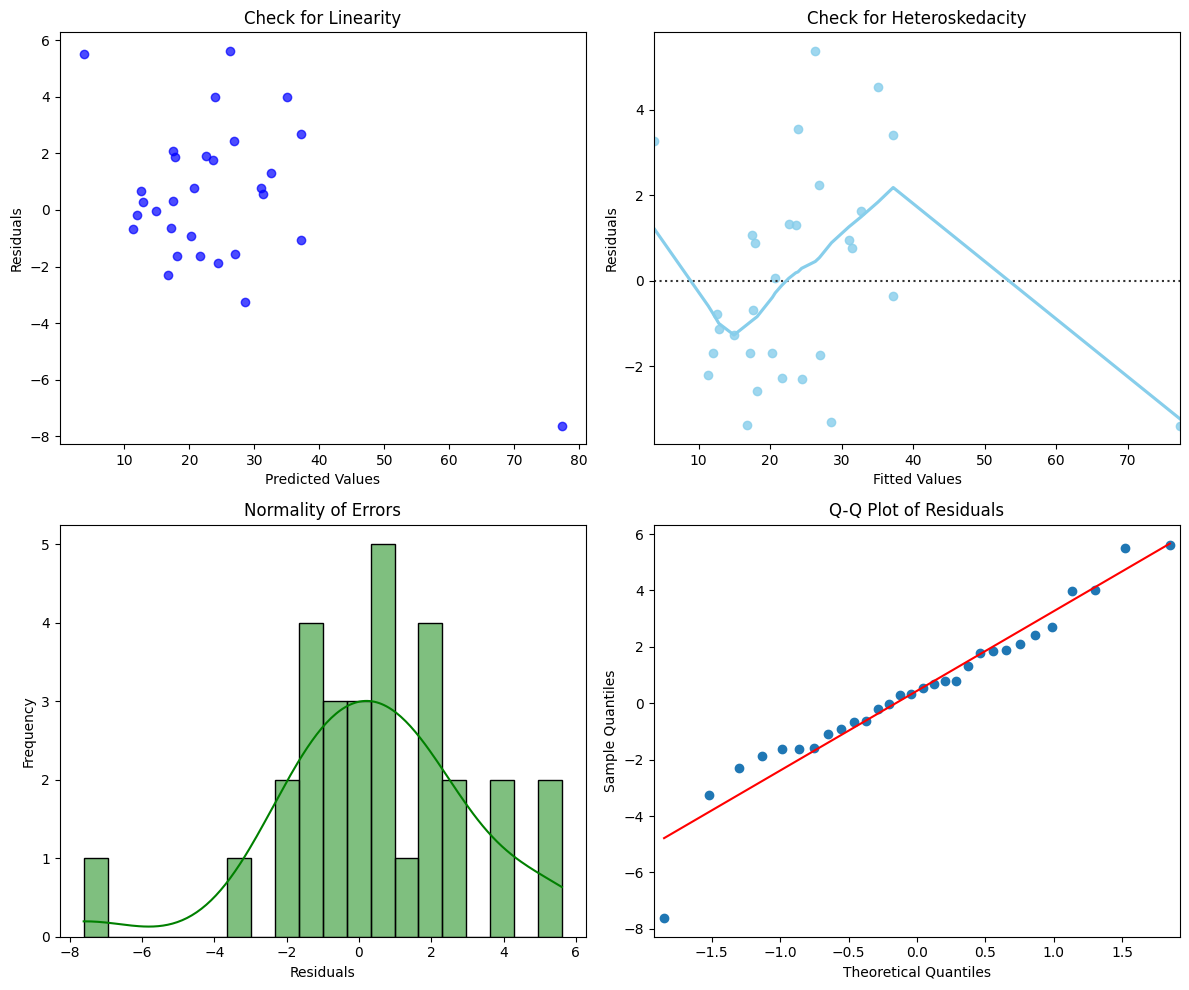

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def plot_residuals(y_test_pred, residuals):
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs. Predicted Values
    axes[0, 0].scatter(y_test_pred, residuals, alpha=0.7, color='b')
    axes[0, 0].set_xlabel('Predicted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Check for Linearity')

    # Residuals vs. Fitted Values Plot
    sns.residplot(x=y_test_pred, y=residuals, lowess=True, color='skyblue', ax=axes[0, 1])
    axes[0, 1].set_title('Check for Heteroskedacity')
    axes[0, 1].set_xlabel('Fitted Values')
    axes[0, 1].set_ylabel('Residuals')

    # Histogram of Residuals with KDE
    sns.histplot(residuals, kde=True, bins=20, ax=axes[1, 0], color='green')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Normality of Errors')

    # Q-Q Plot of Residuals
    sm.qqplot(residuals, line='r', ax=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot of Residuals')

    # Adjust layout for subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Usage example:
# Call this function with your y_test_pred and residuals
plot_residuals(y_test_pred, residuals)


**Feature Selection Method: Backward Selection**

In [ ]:
X_ind = carp.drop(['Price in thousands'], axis=1)
y_dep = carp['Price in thousands']

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

model = LinearRegression()

# split your data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(X_ind, y_dep, test_size=0.25, random_state=42)

# Initialize the SequentialFeatureSelector for backward selection
sfs = SequentialFeatureSelector(model,
                                n_features_to_select=10,  # Number of features to select
                                direction='backward',  # Backward selection
                                cv=5)  # Cross-validation folds

# Fit the SequentialFeatureSelector on the training data
sfs.fit(x_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.get_support(indices=True)

# Get the names of the selected features
selected_features = x_train.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features are {selected_features}')

model = LinearRegression()  # You can adjust the model parameters
model.fit(x_train[selected_features], y_train)

# Calculate Mean Squared Error (MSE) for training and testing data
train_predictions = model.predict(x_train[selected_features])
test_predictions = model.predict(x_test[selected_features])

Selected features are Index(['Manufacturer', 'Model', 'Vehicle type', 'Engine size', 'Horsepower',
       'Width', 'Curb weight', 'Fuel capacity', '4-year resale value_imputed',
       'Day'],
      dtype='object')


In [ ]:
metrics_df = train_test_regression_metrics(x_train, x_test, y_train, y_test, train_predictions, test_predictions)
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,2.140531,2.115254
1,Mean Squared Error,7.673916,7.793561
2,Root Mean Squared Error,2.770183,2.791695
3,R-Squared,96.467184,94.476398
4,Adjusted R-Squared,95.659683,87.678118


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf = RandomForestRegressor()
# Train the model with your training data
rf.fit(X_train, y_train)
# Print a message indicating that the model has been trained
print("Random Forest Regressor Model Trained Successfully")

Random Forest Regressor Model Trained Successfully


In [ ]:
y_train_pred_rf= rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Call the function to get the regression metrics
metrics_df = train_test_regression_metrics(X_train, X_test, y_train, y_test, y_train_pred_rf, y_test_pred_rf)

# Print the combined metrics DataFrame
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,0.978474,2.305395
1,Mean Squared Error,2.247769,8.157071
2,Root Mean Squared Error,1.499256,2.856059
3,R-Squared,98.965202,94.218764
4,Adjusted R-Squared,98.844251,91.617208


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [300, 400, 500],   # Number of trees in the forest
    'max_depth': [None, 7, 10, 15, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 3, 5],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required at leaf nodes
}

# Create a RandomizedSearchCV object with the Random Forest Regressor and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your training data (assuming you have x_train and y_train)
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters and estimator
print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_estimator)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Estimator: RandomForestRegressor(max_depth=15, n_estimators=300)


In [ ]:
y_pred_train_hrf = best_estimator.predict(X_train)
y_pred_test_hrf = best_estimator.predict(X_test)

# Call the function to get the regression metrics
metrics_df = train_test_regression_metrics(X_train, X_test, y_train, y_test, y_pred_train_hrf, y_pred_test_hrf)

# Print the combined metrics DataFrame
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,0.966400,2.280000
1,Mean Squared Error,2.005619,8.157795
2,Root Mean Squared Error,1.416199,2.856185
3,R-Squared,99.076680,94.218251
4,Adjusted R-Squared,98.968759,91.616463


In [ ]:
residuals_hrf= y_test-y_pred_test_hrf

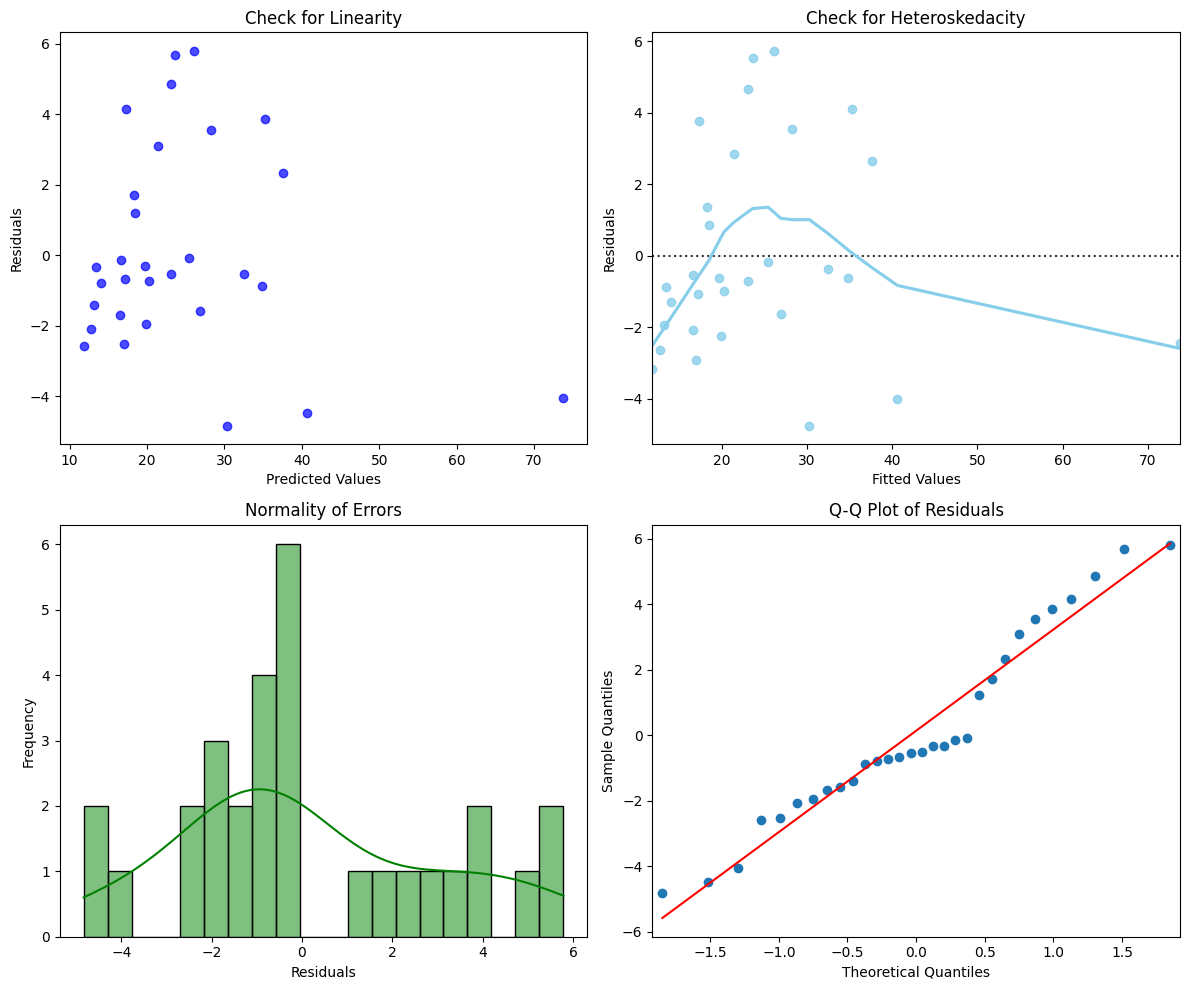

In [ ]:
plot_residuals(y_pred_test_hrf, residuals_hrf)

#XG Boost Regressor

In [ ]:
X_train

,Sales in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Curb weight,4-year resale value_imputed
144,9.835,4.7,230.0,112.2,76.4,192.5,25.4,5.115,34.080
80,42.541,2.4,154.0,100.8,68.9,175.4,15.9,2.910,10.395
95,3.311,5.0,302.0,99.0,71.3,177.1,21.1,4.125,58.600
37,71.186,2.5,168.0,108.0,71.0,186.0,16.0,3.058,10.185
88,67.956,3.0,153.0,108.5,73.0,199.7,16.0,3.379,11.030
...,...,...,...,...,...,...,...,...,...
138,63.849,3.0,210.0,107.1,71.7,191.9,18.5,3.417,18.140
17,11.185,3.0,200.0,107.4,70.3,194.8,18.0,3.770,18.225
116,24.155,2.4,150.0,113.3,76.8,186.3,20.0,3.528,12.025
61,76.029,3.5,210.0,118.1,75.6,201.2,20.0,4.288,19.490


In [ ]:
import xgboost as xgb

# Create an XGBoost Regressor model
xgboost_model = xgb.XGBRegressor()

# Train the model with your training data
xgboost_model.fit(X_train, y_train)

# Print a message indicating that the model has been trained
print("XGBoost Regressor Model Trained Successfully")

XGBoost Regressor Model Trained Successfully


In [ ]:
y_train_pred_xg= xgboost_model.predict(X_train)
y_test_pred_xg = xgboost_model.predict(X_test)

# Call the function to get the regression metrics
metrics_df = train_test_regression_metrics(X_train, X_test, y_train, y_test, y_train_pred_xg, y_test_pred_xg)

# Print the combined metrics DataFrame
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,6.410365e-04,2.043583
1,Mean Squared Error,7.748019e-07,6.768412
2,Root Mean Squared Error,8.802283e-04,2.601617
3,R-Squared,1.000000e+02,95.202961
4,Adjusted R-Squared,1.000000e+02,93.044294


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost Regressor model
xgb_regressor = xgb.XGBRegressor()

# Define the hyperparameter grid to search
param_grid_xgb = {
    'n_estimators': [10,20,30],  # Number of boosting rounds
    'max_depth': [2,3,4],                # Maximum depth of individual trees
    'learning_rate': [0.1, 0.2, 0.3],   # Step size shrinkage used in update to prevent overfitting
    'gamma': [0, 0.1, 0.2],              # Minimum loss reduction required to make a further partition
}

# Create a GridSearchCV object with the XGBoost Regressor and parameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters and estimator
print("Best Hyperparameters:", best_params_xgb)
print("Best Estimator:", best_estimator_xgb)

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20}
Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
y_pred_train_hxg = best_estimator_xgb.predict(X_train)
y_pred_test_hxg = best_estimator_xgb.predict(X_test)

# Call the function to get the regression metrics
metrics_df = train_test_regression_metrics(X_train, X_test, y_train, y_test, y_pred_train_hxg, y_pred_test_hxg)

# Print the combined metrics DataFrame
metrics_df

,Metric,Training Data,Testing Data
0,Mean Absolute Error,1.004136,2.054952
1,Mean Squared Error,2.293815,7.793307
2,Root Mean Squared Error,1.514534,2.791650
3,R-Squared,98.944004,94.476578
4,Adjusted R-Squared,98.820576,91.991038


In [ ]:
residuals_xgb= y_test-y_pred_test_hxg

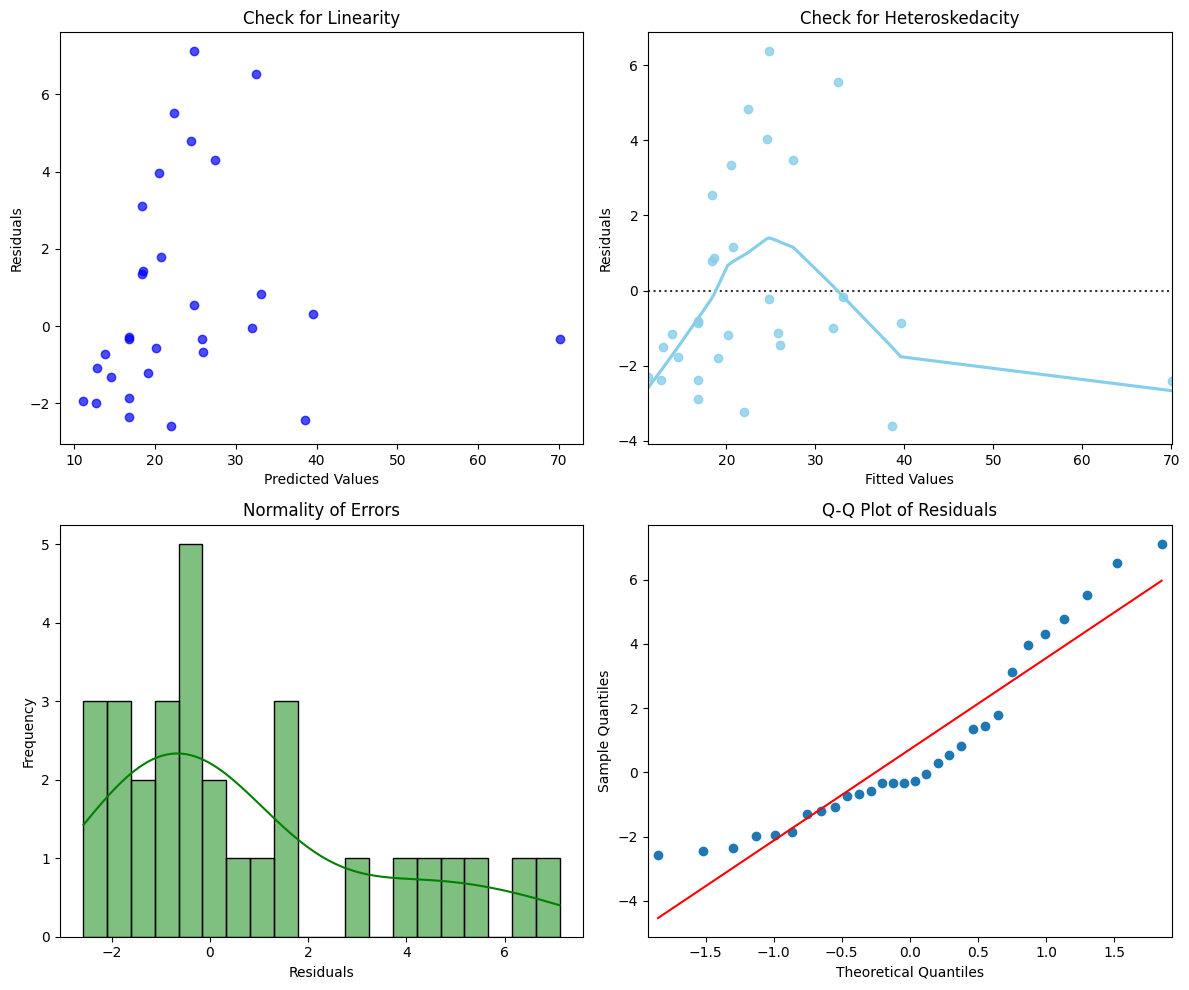

In [ ]:
plot_residuals(y_pred_test_hxg, residuals_xgb)